In [1]:
#link up of kaggle with googlecolab
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keerthicheepurupalli","key":"f02408fd3daeadbf81aacccfd06e5c92"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 76 Apr 10 06:34 kaggle.json
{"username":"keerthicheepurupalli","key":"f02408fd3daeadbf81aacccfd06e5c92"}

In [4]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 5.3MB 11.8MB/s 
     |████████████████████████████████| 112kB 48.9MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 112kB 55.4MB/s 


In [5]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-03 22:53:52          46857  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           2187  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        357KB  2020-04-09 21:07:26           2468  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            538  
bappekim/air-pollution-in-seoul               

In [6]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2335           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      17772           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4568           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        311           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2983           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6188   

In [7]:
#downloading dataset from kaggle
!kaggle competitions download -c malware-classification 

  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 71.0MB/s]
100% 17.5G/17.5G [04:52<00:00, 75.9MB/s]
100% 17.5G/17.5G [04:52<00:00, 64.4MB/s]
  0% 0.00/4.06M [00:00<?, ?B/s]
100% 4.06M/4.06M [00:00<00:00, 37.3MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 88.8MB/s]
100% 17.8G/17.8G [05:15<00:00, 67.0MB/s]
100% 17.8G/17.8G [05:15<00:00, 60.5MB/s]


In [8]:
!pip install py7zr 

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 13.7MB 13.9MB/s 


In [0]:
!mkdir  /content/dataset

In [10]:
#extracting data from 7z dataset file
!python -m py7zr x /content/train.7z /content/dataset
!py7zr x /content/train.7z

!python -m py7zr x /content/test.7z /content/dataset
!py7zr x /content/test.7z

^C
^C
^C
^C


In [0]:
#separating bytefiles and asm in train dataset
!mkdir /content/dataset/train/train_bytefiles
!mkdir /content/dataset/train/train_asm

In [0]:
import os
import shutil
source = '/content/dataset/train/'
dest1 = '/content/dataset/train/train_bytefiles'

files = os.listdir(source)
fi = os.listdir(dest1)
for f in files:
    if (f.endswith("bytes")):
        shutil.move(source+f,dest1)

import os
import shutil
source = '/content/dataset/train/'
dest2 = '/content/dataset/train/train_asm'

files = os.listdir(source)
fi = os.listdir(dest2)
for f in files:
    if (f.endswith("asm")):
        shutil.move(source+f,dest2)

In [0]:
#separating bytefiles and asm in test dataset
!mkdir /content/dataset/test/test_bytefiles
!mkdir /content/dataset/test/test_asm

In [0]:
import os
import shutil
source = '/content/dataset/test/'
dest1 = '/content/dataset/test/test_bytefiles'

files = os.listdir(source)
fi = os.listdir(dest1)
for f in files:
    if (f.endswith("bytes")):
        shutil.move(source+f,dest1)

import os
import shutil
source = '/content/dataset/test/'
dest2 = '/content/dataset/test/test_asm'

files = os.listdir(source)
fi = os.listdir(dest2)
for f in files:
    if (f.endswith("asm")):
        shutil.move(source+f,dest2)

In [0]:
#converting train_byte files into images
!mkdir /content/dataset/train/train_bytefiles/imageb

In [0]:
import os
from PIL import Image
import numpy
import binascii


def getMatrixfrom_bin(filename, width = 512, oneRow = False):
    with open(filename, 'rb') as f:
        content = f.read()
    hexst = binascii.hexlify(content)
    fh = numpy.array([int(hexst[i:i+2],16) for i in range(0, len(hexst), 2)])
    if oneRow is False:
        rn = len(fh)//width
        fh = numpy.reshape(fh[:rn*width],(-1,width))
    fh = numpy.uint8(fh)
    return fh


directory = '/content/dataset/train/train_bytefiles/'

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".bytes"):
        im =  Image.fromarray(getMatrixfrom_bin(directory+filename,512))
        im.save( directory + "imageb/" + os.path.splitext(filename)[0] +".png" )
    else:
        continue

In [0]:
#reciprocating each image to class folders in train dataset
!mkdir /content/dataset/train/train_bytefiles/imageb/1
!mkdir /content/dataset/train/train_bytefiles/imageb/2
!mkdir /content/dataset/train/train_bytefiles/imageb/3
!mkdir /content/dataset/train/train_bytefiles/imageb/4
!mkdir /content/dataset/train/train_bytefiles/imageb/5
!mkdir /content/dataset/train/train_bytefiles/imageb/6
!mkdir /content/dataset/train/train_bytefiles/imageb/7
!mkdir /content/dataset/train/train_bytefiles/imageb/8
!mkdir /content/dataset/train/train_bytefiles/imageb/9

In [18]:
import pandas as pd
import shutil
import os

ad = pd.read_csv("./trainLabels.csv")
ad['Id'] = ad['Id'] + ".png"
source = os.listdir('/content/dataset/train/train_bytefiles/imageb/')
destination = ['/content/dataset/train/train_bytefiles/imageb/1',
               '/content/dataset/train/train_bytefiles/imageb/2',
               '/content/dataset/train/train_bytefiles/imageb/3',
               '/content/dataset/train/train_bytefiles/imageb/4',
               '/content/dataset/train/train_bytefiles/imageb/5',
               '/content/dataset/train/train_bytefiles/imageb/6',
               '/content/dataset/train/train_bytefiles/imageb/7',
               '/content/dataset/train/train_bytefiles/imageb/8',
               '/content/dataset/train/train_bytefiles/imageb/9']
for files in source:
    if files.endswith(".png"):
        fileq = str(files)
        print(fileq)
        b = ad[ad['Id']== fileq]
        classA = b['Class']
        print(classA)
        index = classA.iloc[0]
        index = index - 1
        shutil.move('/content/dataset/train/train_bytefiles/imageb/'+files,destination[index])


DALwrgpdQcolMWVBzb1t.png
7175    4
Name: Class, dtype: int64
iguj6WF7SPzs9evTrl2n.png
3630    2
Name: Class, dtype: int64
KXy5fwEeZon9r6bHAvRg.png
7400    4
Name: Class, dtype: int64
cmzfHMpd2Vv6ZyqPOwjU.png
9197    8
Name: Class, dtype: int64
DaL5EU7cJxGbqos4Tukv.png
2808    2
Name: Class, dtype: int64
IGlj5HAEq1FUhbC9JWvr.png
3629    2
Name: Class, dtype: int64
bzIioU6hX7AsZJDH1LMd.png
700    1
Name: Class, dtype: int64
du6hbLIPwW2aGYZkNRQV.png
8431    7
Name: Class, dtype: int64
9sPtSV8rx5WNUukQ4qln.png
2331    2
Name: Class, dtype: int64
27sRSvhiI1wEBfnGMtUo.png
8707    8
Name: Class, dtype: int64
kRUx3TuoJSgp0sqDzNGX.png
7396    4
Name: Class, dtype: int64
H7LQjtba5R2NymoArTdi.png
6372    3
Name: Class, dtype: int64
ljuryB4bfagHqV5FM9Ae.png
7426    4
Name: Class, dtype: int64
7aV6QqpmJ10OMfNsAw9k.png
2115    2
Name: Class, dtype: int64
F8CeVXzxLhnjo0BHATPZ.png
7965    6
Name: Class, dtype: int64
lC4sdkhcZS6zYaE53D1v.png
7410    4
Name: Class, dtype: int64
IGlvaPi7VTjxkAmFb05C.png


In [19]:
!ls -a /content/dataset/train/train_bytefiles/imageb

import os

def count_files(in_directory):
    joiner= (in_directory + os.path.sep).__add__
    return sum(
        os.path.isfile(filename)
        for filename
        in map(joiner, os.listdir(in_directory))
    )
print(count_files('/content/train'))
print(count_files('/content/dataset/train/train_bytefiles'))
print(count_files('/content/dataset/train/train_asm'))
print(count_files('/content/dataset/test/test_bytefiles'))
print(count_files('/content/dataset/test/test_asm'))
print(count_files('/content/dataset/train/train_bytefiles/imageb'))

.  ..  1  2  3	4  5  6  7  8  9
375
221
152
137
151
0


In [21]:
#!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import applications
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers
from keras import regularizers
from keras.callbacks import Callback
import warnings
import math

1.14.0


In [0]:
img_width, img_height = 331,331

In [0]:
top_model_weights_path = 'bn_fc_model.h5'
train_data_dir = '/content/dataset/train/train_bytefiles/imageb'
test_data_dir = '/content/dataset/test/test_bytefiles/imagebt'
epochs = 800
batch_size = 13

In [27]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.1)

    model = applications.nasnet.NASNetLarge(include_top=False, weights='imagenet')
    train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode = 'categorical',
        shuffle=False)
    
    bottleneck_features_train = model.predict_generator(
        train_generator, int(math.ceil(train_generator.samples // batch_size)))
    
    np.save(open('bnf_train.npy', 'wb'),
            bottleneck_features_train)

    valid_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode = 'categorical',
        shuffle=False)
    
    bottleneck_features_validation = model.predict_generator(
        valid_generator,int(math.ceil(valid_generator.samples // batch_size)))
    
    np.save(open('bnf_validation.npy', 'wb'),
            bottleneck_features_validation)
    
save_bottlebeck_features()

Found 221 images belonging to 9 classes.
Found 221 images belonging to 9 classes.


In [28]:
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.1)
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
valid_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 221 images belonging to 9 classes.
Found 221 images belonging to 9 classes.


In [0]:
class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='val_acc', value=0.99, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        print(current)

        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [31]:
train_data = np.load(open('bnf_train.npy','rb'))
train_labels = train_generator.classes
train_labels = to_categorical(train_labels, 9)

validation_data = np.load(open('bnf_validation.npy','rb'))
validation_labels = valid_generator.classes
validation_labels = to_categorical(validation_labels, 9)

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_data.shape[1:]))
model.add(Dense(9, activation='softmax')) 


model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

checkpoint = ModelCheckpoint("mal-m.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
estop = EarlyStoppingByAccuracy()

tens = TensorBoard(log_dir='./logs')

model.fit(train_data, train_labels,
              epochs=700,
              batch_size=13,
              validation_data=(validation_data, validation_labels),
              callbacks = [checkpoint,tens,estop]
              )
loss, accuracy = model.evaluate(validation_data, validation_labels, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 4032)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 36297     
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________
Train on 221 samples, validate on 221 samples
Epoch 1/700
221/221 [==============================] - 2s 11ms/step - loss: 1.8803 - acc: 0.2670 - val_loss: 1.6281 - val_acc: 0.4208

Epoch 00001: val_acc improved from -inf to 0.42081, saving model to mal-m.h5
0.42081448523437276
Epoch 2/700
221/221 [==============================] - 1s 3ms/step - loss: 1.5400 - acc: 0.5068 - val_loss: 1.4175 - val_acc: 0.5023

Epoch 00002: val_acc improved from 0.42081 to 0.50226, saving model to mal-m.h5
0.5022624573286842
E

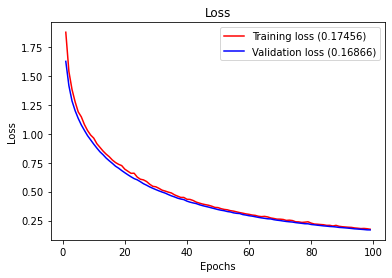

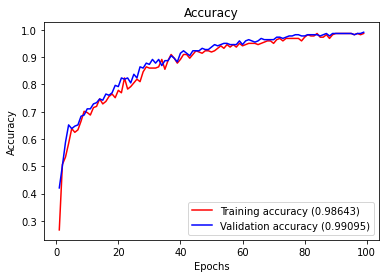

In [32]:
from matplotlib import pyplot as plt


def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'r', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'b', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(model.history)